# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [227]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [228]:
executable_path = {'executable_path':"C:/Users/speer/msuDataAnalytics/chromedriver.exe"}

# Launch the browser
browser = Browser('chrome', **executable_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [229]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [230]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [231]:
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [232]:
# Extract all rows of data
rows = soup.find_all('tr', class_ = 'data-row')
headings = soup.find_all('th')

In [233]:
headings

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [234]:
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [235]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    mars_data.append(row.get_text())
mars_data

['\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n',
 '\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n',
 '\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n',
 '\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n',
 '\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n',
 '\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n',
 '\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n',
 '\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n',
 '\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n',
 '\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n',
 '\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n',
 '\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n',
 '\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n',
 '\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n',
 '\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n',
 '\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n',
 '\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n',
 '\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n',
 '\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.0\n',
 '\n175\n2012-09-08\n33\n168\n6\n-73.0\n748.0\n',
 '\n176\n

In [236]:
mars_data

['\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n',
 '\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n',
 '\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n',
 '\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n',
 '\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n',
 '\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n',
 '\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n',
 '\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n',
 '\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n',
 '\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n',
 '\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n',
 '\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n',
 '\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n',
 '\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n',
 '\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n',
 '\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n',
 '\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n',
 '\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n',
 '\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.0\n',
 '\n175\n2012-09-08\n33\n168\n6\n-73.0\n748.0\n',
 '\n176\n

In [237]:
headings_list = []
# scraping the header text
for header in headings:
    #print(header.get_text())
    headings_list.append(header.get_text())
headings_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [238]:
mars_raw_df = pd.DataFrame(mars_data)
mars_raw_df = mars_raw_df.rename(columns={0: 'column'})
mars_raw_df

,column
0,\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n
1,\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n
2,\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n
3,\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n
4,\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n
...,...
1862,\n1889\n2018-02-23\n1973\n133\n5\n-78.0\n730.0\n
1863,\n1892\n2018-02-24\n1974\n134\n5\n-77.0\n729.0\n
1864,\n1894\n2018-02-25\n1975\n134\n5\n-76.0\n729.0\n
1865,\n1893\n2018-02-26\n1976\n135\n5\n-77.0\n728.0\n


In [239]:
mars_ex_split_row = mars_raw_df['column'].str.split('\n', n=7, expand=True)
mars_ex_split_row

,0,1,2,3,4,5,6,7
0,,2,2012-08-16,10,155,6,-75.0,739.0\n
1,,13,2012-08-17,11,156,6,-76.0,740.0\n
2,,24,2012-08-18,12,156,6,-76.0,741.0\n
3,,35,2012-08-19,13,157,6,-74.0,732.0\n
4,,46,2012-08-20,14,157,6,-74.0,740.0\n
...,...,...,...,...,...,...,...,...
1862,,1889,2018-02-23,1973,133,5,-78.0,730.0\n
1863,,1892,2018-02-24,1974,134,5,-77.0,729.0\n
1864,,1894,2018-02-25,1975,134,5,-76.0,729.0\n
1865,,1893,2018-02-26,1976,135,5,-77.0,728.0\n


In [240]:
headings_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [241]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_clean_df = pd.DataFrame()
mars_clean_df = mars_raw_df['column'].str.split('\n', n=7, expand=True)
mars_clean_df = mars_clean_df.rename(columns={1: "id", 
                                              2: "terrestrial_date",
                                              3: 'sol',
                                              4: 'ls',
                                              5: 'month',
                                              6: 'min_temp',
                                              7: 'pressure'})
mars_clean_df['pressure'] = mars_clean_df['pressure'].apply(lambda x: x.strip('\n'))
mars_clean_df.head()

,0,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,,2,2012-08-16,10,155,6,-75.0,739.0
1,,13,2012-08-17,11,156,6,-76.0,740.0
2,,24,2012-08-18,12,156,6,-76.0,741.0
3,,35,2012-08-19,13,157,6,-74.0,732.0
4,,46,2012-08-20,14,157,6,-74.0,740.0


In [242]:
# Confirm DataFrame was created successfully
mars_clean_df.head()

,0,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,,2,2012-08-16,10,155,6,-75.0,739.0
1,,13,2012-08-17,11,156,6,-76.0,740.0
2,,24,2012-08-18,12,156,6,-76.0,741.0
3,,35,2012-08-19,13,157,6,-74.0,732.0
4,,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [243]:
# Examine data type of each column
mars_clean_df.dtypes

0                   object
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [244]:
# Change data types for data analysis
mars_clean_df['terrestrial_date'] = pd.to_datetime(mars_clean_df['terrestrial_date'])
mars_clean_df['id'] = pd.to_numeric(mars_clean_df['id'])
mars_clean_df['sol'] = pd.to_numeric(mars_clean_df['sol'])
mars_clean_df['ls'] = pd.to_numeric(mars_clean_df['ls'])
mars_clean_df['month'] = pd.to_numeric(mars_clean_df['month'])
mars_clean_df['min_temp'] = pd.to_numeric(mars_clean_df['min_temp'])
mars_clean_df['pressure'] = pd.to_numeric(mars_clean_df['pressure'])

mars_clean_df.dtypes

0                           object
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [245]:
# Confirm type changes were successful by examining data types again

mars_clean_df.dtypes

0                           object
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [246]:
mars_clean_df.head()

,0,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,,2,2012-08-16,10,155,6,-75.0,739.0
1,,13,2012-08-17,11,156,6,-76.0,740.0
2,,24,2012-08-18,12,156,6,-76.0,741.0
3,,35,2012-08-19,13,157,6,-74.0,732.0
4,,46,2012-08-20,14,157,6,-74.0,740.0


In [247]:
# 1. How many months are there on Mars?
len(mars_clean_df['month'].unique())

12

The above cell shows that there are 12 months on Mars, though I think there are actually 24 ([Suran, 1997](https://www.sciencedirect.com/science/article/abs/pii/S0032063397000330#:~:text=A%20common%20year%20would%20have,weeks%20of%207%20days%20each).)). Also, the starter notebook used just `.value_counts()` to find this information. In my opinion, it would be more precice to take use `len()` on either `.unique()` or `.value_counts()` to get this number, as value counts provides information that was not asked for. 

In [248]:
# 2. How many Martian days' worth of data are there?
len(mars_clean_df['sol'].unique())

1867

In [249]:
# 3. What is the average low temperature by month?
mars_clean_df.groupby('month').agg('mean', numeric_only=True)['min_temp']

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [250]:
mars_clean_df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

Text(0, 0.5, 'Temperature in Celsius')

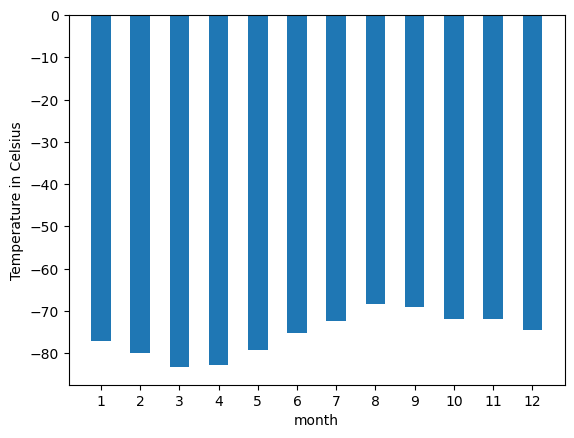

In [251]:
# Plot the average temperature by month
plt.bar(sorted(mars_clean_df['month'].unique()), mars_clean_df.groupby('month').agg('mean', numeric_only=True)['min_temp'],
        width=0.5)
plt.xticks(sorted(mars_clean_df['month'].unique()))
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

Text(0, 0.5, 'Temperature in Celsius')

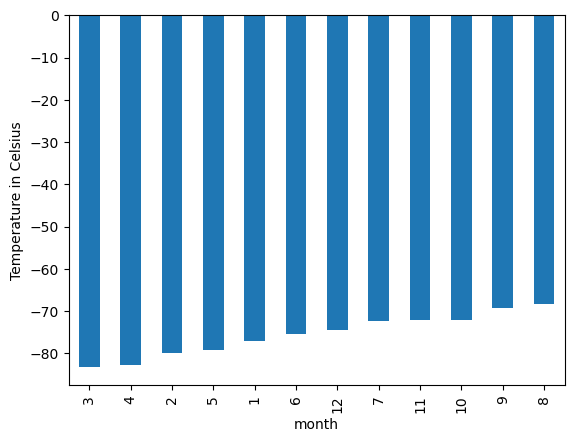

In [252]:
sorted_months_avg_temp = mars_clean_df.groupby('month').agg('mean', numeric_only=True)['min_temp'].sort_values()
sorted_months_avg_temp.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

In [253]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_clean_df.groupby(['month']).agg('mean', numeric_only=True)['pressure']
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

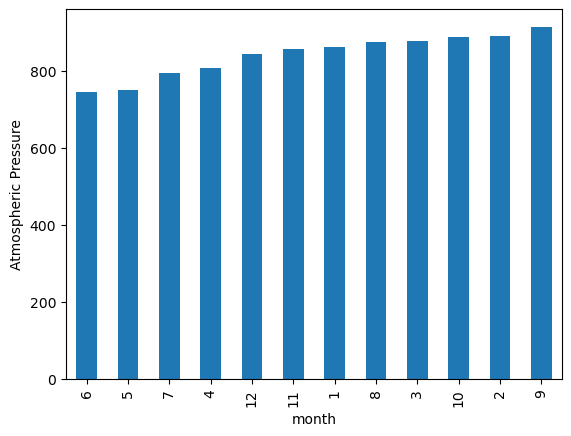

In [254]:
# Plot the average pressure by month
sorted_months_avg_pressure = avg_pressure_by_month.sort_values()
sorted_months_avg_pressure.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')

In [255]:
mars_clean_df.head()

,0,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,,2,2012-08-16,10,155,6,-75.0,739.0
1,,13,2012-08-17,11,156,6,-76.0,740.0
2,,24,2012-08-18,12,156,6,-76.0,741.0
3,,35,2012-08-19,13,157,6,-74.0,732.0
4,,46,2012-08-20,14,157,6,-74.0,740.0


Text(0.5, 0, 'Martian Days')

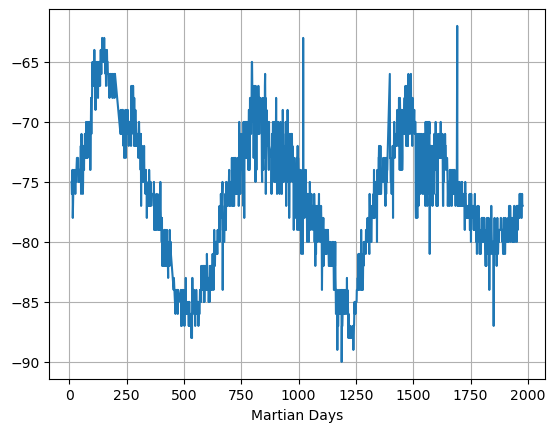

In [256]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_clean_df['sol'], mars_clean_df['min_temp'])
plt.grid()
plt.xlabel('Martian Days')

Judging by average minimum temperature, the third and fourth month of the Martian year are the coldest. The ninth and eigth month are the warmest. 

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

"The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days."

The quote above was provided by the starter notebook, but it doesn't fully explain the situation. We were told that the `sols` column represented the number of martian days passed since curiosity landed on Mars. However, because a Martian day is relatively equivalent to an Earth day, an estimate of the *Martian days in a Martian year* returns a similar result as an estimate of the *Earth days in a Martian year*. I mention all of this because I was confused about why, in the starter notebook, the x axis was labelled "Terrestrial days" and not "sols" or "Martian days". 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [257]:
# Write the data to a CSV
mars_clean_df.to_csv("mars_clean_df.csv")

In [258]:
browser.quit()